IMPORT LIBRARY

SEBELUM DI RUN, upload file books_price.csv dan rating_scale.csv. Setiap ganti user, cell, 1, 2, 3 di run ulang dulu!

In [46]:
! pip install kaggle
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
#NGELOAD DATASET
dataset = pd.read_csv("/content/rating_scale.csv", sep=",")
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
n_users = len(dataset.user_id.unique())
n_books = len(dataset.book_id.unique())

In [48]:
#model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model

book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

conc = Concatenate()([book_vec, user_vec])

fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(64, activation='relu')(fc1)
fc3 = Dense(32, activation='relu')(fc2)
fc4 = Dense(16, activation='relu')(fc3)
out = Dense(1)(fc4)

model2_8juni10 = Model([user_input, book_input], out)
model2_8juni10.compile('adam', 'mean_squared_error')

In [11]:
#Training model
history = model2_8juni10.fit([train.user_id, train.book_id], train.scale_rating, epochs=10, batch_size=16, verbose=1)
model2_8juni10.save('regression_model2_8juni10.h5')

Epoch 1/10
49088/49088 [==============================] - 242s 5ms/step - loss: 0.0316
Epoch 2/10
49088/49088 [==============================] - 268s 5ms/step - loss: 0.0276
Epoch 3/10
49088/49088 [==============================] - 268s 5ms/step - loss: 0.0262
Epoch 4/10
49088/49088 [==============================] - 241s 5ms/step - loss: 0.0250
Epoch 5/10
49088/49088 [==============================] - 241s 5ms/step - loss: 0.0239
Epoch 6/10
49088/49088 [==============================] - 249s 5ms/step - loss: 0.0230
Epoch 7/10
49088/49088 [==============================] - 261s 5ms/step - loss: 0.0224
Epoch 8/10
49088/49088 [==============================] - 239s 5ms/step - loss: 0.0218
Epoch 9/10
49088/49088 [==============================] - 239s 5ms/step - loss: 0.0214
Epoch 10/10
49088/49088 [==============================] - 232s 5ms/step - loss: 0.0210


In [40]:
#NGELIAT DAFTAR BUKU
books = pd.read_csv('books_price.csv')
books.head(20)


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,price
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,127621
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,133439
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,179127
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,103978
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,140962
5,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...,186245
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...,87635
7,8,5107,5107,3036731,360,316769177,9.780317e+12,J.D. Salinger,1951.0,The Catcher in the Rye,...,2120637,44920,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...,121966
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...,175429
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...,137244


In [49]:
#Recommendation system
import pandas as pd


rating = pd.read_csv("/content/rating_scale.csv", sep=",")
max_user_id = rating['user_id'].max()
new_user_id = rating['user_id'].max()+1
new_user_book = []
#new_user_book = [1406, 1308, 6006, 2008] # buku yang dipilih masih asal
z = 0
while z < 3:
  print(f'Please insert three book id to be rated!')
  new_book = int(input("Book id : "))
  new_user_book = [new_book]
  list_rating =[]
  for i in new_user_book:
    print(f'Rating on book {i}')
    new_user_rating = int(input("Rating : "))
    List = [new_book,new_user_id,new_user_rating,new_user_rating/5]
    list_rating.append(List)

  from csv import writer
  def append_list_as_row(file_name, list_elements):
      with open(file_name, 'a+', newline='') as write_object:
          csv_writer = writer(write_object)
          csv_writer.writerows(list_elements)

  append_list_as_row('rating_scale.csv', list_rating)
  z = z+1

book_data = np.array(list(set(dataset.book_id)))
user = np.array([max_user_id for i in range(len(book_data))])
predictions = model2_8juni10.predict([user, book_data])
predictions = np.array([a[0] for a in predictions])
recommended_book_ids = (-predictions).argsort()[:5]

books = pd.read_csv('books_price.csv')
books.head()
print('Buku yang mungkin kamu suka')
print(books[books['id'].isin(recommended_book_ids)])

#print(recommended_book_ids)
#print(predictions[recommended_book_ids])

Please insert three book id to be rated!
Book id : 34
Rating on book 34
Rating : 3
Please insert three book id to be rated!
Book id : 23
Rating on book 23
Rating : 4
Please insert three book id to be rated!
Book id : 12
Rating on book 12
Rating : 3
Buku yang mungkin kamu suka
        id   book_id  best_book_id   work_id  books_count        isbn  \
1233  1234     67920         67920   2912372           36   446359408   
3539  3540      9555          9555    693417           80   679750533   
5417  5418   9628743       9628743  14516046           30  140006760X   
7670  7671    896622        896622   1331430           48   380007789   
9039  9040  24396884      24396884  43981459           24   316407038   

            isbn13                                      authors  \
1233  9.780446e+12                        Flora Rheta Schreiber   
3539  9.780680e+12  Haruki Murakami, Jay Rubin, Alfred Birnbaum   
5417  9.781400e+12                                David  Brooks   
7670  9.780380e+

CODE DI BAWAH GAK USAH DIMASUKIN!

In [12]:
# Extract embeddings
book_em = model2_8juni10.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [24]:
rating = pd.read_csv("/content/rating_scale.csv", sep=",")
max_user_id = rating['user_id'].max()
print(max_user_id)

53426


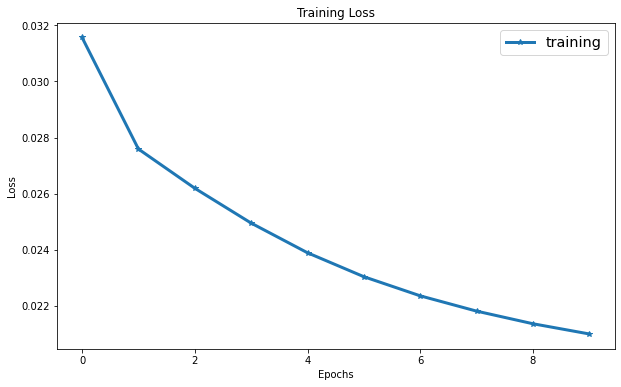

In [13]:
def visualize_training(history, lw = 3):

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(history)

In [ ]:
#model2_8juni10.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 17s 3ms/step - loss: 15.7980


15.798007011413574

In [7]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download zygmunt/goodbooks-10k
! unzip goodbooks-10k.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open goodbooks-10k.zip, goodbooks-10k.zip.zip or goodbooks-10k.zip.ZIP.


In [ ]:
#from keras.models import load_model

#if os.path.exists('regression_model2.h5'):
    #model2 = load_model('regression_model2.h5')
#else:
    #history = model2_6juni9.fit([train.user_id, train.book_id], train.scale_rating, epochs=10, verbose=1)
    #model2.save('regression_model2.h5')
    #plt.plot(history.history['loss'])
    #plt.xlabel("Epochs")
    #plt.ylabel("Training Error")

NameError: ignored

In [ ]:
#history = model.fit([train.user_id, train.book_id], train.rating, epochs=10, verbose=1)
#model.save('regression_model.h5')

Epoch 1/10
24544/24544 [==============================] - 81s 3ms/step - loss: 14.1981
Epoch 2/10
24544/24544 [==============================] - 80s 3ms/step - loss: 5.0596
Epoch 3/10
24544/24544 [==============================] - 79s 3ms/step - loss: 1.8623
Epoch 4/10
24544/24544 [==============================] - 79s 3ms/step - loss: 1.2093
Epoch 5/10
24544/24544 [==============================] - 79s 3ms/step - loss: 0.9593
Epoch 6/10
24544/24544 [==============================] - 80s 3ms/step - loss: 0.8335
Epoch 7/10
24544/24544 [==============================] - 80s 3ms/step - loss: 0.7609
Epoch 8/10
24544/24544 [==============================] - 81s 3ms/step - loss: 0.7160
Epoch 9/10
24544/24544 [==============================] - 79s 3ms/step - loss: 0.6861
Epoch 10/10
24544/24544 [==============================] - 76s 3ms/step - loss: 0.6660


In [ ]:
#model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 6s 929us/step - loss: 0.7121


0.7121356129646301

In [ ]:
#predictions = model2_8juni10.predict([test.user_id.head(30), test.book_id.head(30)])

#[print(predictions[i]*5, test.rating.iloc[i]) for i in range(0,30)]

[5.352394] 5
[3.56746] 4
[3.2250478] 3
[4.219908] 5
[2.97132] 3
[4.0836625] 3
[2.8719854] 3
[4.998886] 4
[4.6083784] 3
[4.498634] 5
[3.5303628] 5
[2.763485] 4
[4.431861] 5
[3.8245754] 5
[4.377733] 5
[4.5481305] 5
[3.4868164] 4
[2.826605] 4
[4.3062625] 4
[3.8144186] 4
[4.0296836] 4
[4.486546] 3
[4.8702292] 2
[4.7375355] 3
[3.6955392] 3
[4.232916] 3
[3.4170704] 4
[4.0070577] 3
[2.6085508] 2
[4.456669] 5


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

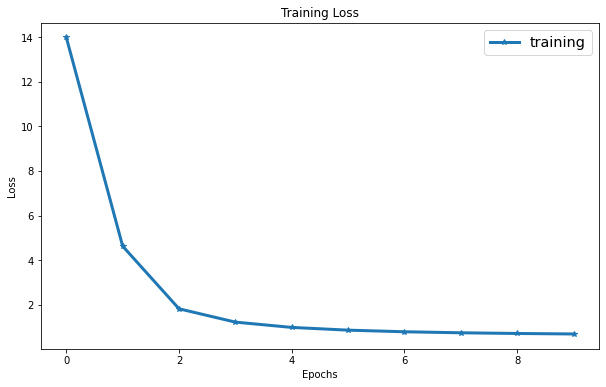

In [ ]:
#def visualize_training(history, lw = 3):

    #plt.figure(figsize=(10,6))
    #plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    #plt.title('Training Loss')
    #plt.xlabel('Epochs')
    #plt.ylabel('Loss')
    #plt.legend(fontsize = 'x-large')
    #plt.show()
#visualize_training(history)

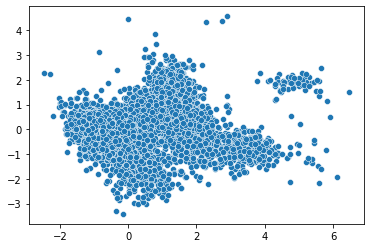

In [ ]:
#from sklearn.decomposition import PCA
#import seaborn as sns

#pca = PCA(n_components=2)
#pca_result = pca.fit_transform(book_em_weights)
#sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
books = pd.read_csv('books.csv')
books.head()
print(books[books['id'].isin(recommended_book_ids)])

        id   book_id  best_book_id   work_id  books_count       isbn  \
1786  1787  20317106      20317106  28155746            7        NaN   
3751  3752    140302        477597   1952109          141        NaN   
8852  8853    168569        168569   1520707           35  425157539   
8944  8945     32529         32529   3214115           40  752848267   
9840  9841     15101         15101    876908           55  380815923   

            isbn13          authors  original_publication_year  \
1786           NaN        محمد صادق                     2014.0   
3751           NaN  Agatha Christie                     1924.0   
8852  9.780425e+12    John Sandford                     1996.0   
8944  9.780753e+12     Lisa Gardner                     2001.0   
9840  9.780381e+12    Joanne Harris                     1999.0   

           original_title  ... ratings_count work_ratings_count  \
1786                هيبتا  ...         42978              43298   
3751  Poirot Investigates  ...      

In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(model2_8juni10)
tfl_classifier = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp8gthhuuj/assets


INFO:tensorflow:Assets written to: /tmp/tmp8gthhuuj/assets


In [36]:
with open('classifier.tflite', 'wb') as f:
  f.write(tfl_classifier)

In [ ]:
#book_data = np.array(list(set(dataset.book_id)))
#user = np.array([az for i in range(len(book_data))])
#predictions = model2_8juni10.predict([user, book_data])
#predictions = np.array([a[0] for a in predictions])
#recommended_book_ids = (-predictions).argsort()[:5]
#print(recommended_book_ids)
#print(predictions[recommended_book_ids])

NameError: ignored